In [4]:
import os
from glob import glob
from matplotlib.patches import Polygon, Rectangle
import re

from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
class_dic = {0: '가리비구이', 1: '가자미구이', 2: '가자미조림', 3: '가지나물', 4: '가지냉국', 5: '가지볶음', 
                6: '가지전', 7: '가지찜', 8: '감', 9: '개불', 10: '거봉', 11: '게살죽', 12: '게찜', 13: '고구마', 
                14: '고래고기', 15: '고사리나물', 16: '고사리볶음', 17: '고추잡채', 18: '곤약조림', 19: '골뱅이무침', 
                20: '곱창볶음', 21: '곶감', 22: '과일샐러드', 23: '구아바', 24: '구절판', 25: '굴무생채', 26: '굴전', 
                27: '귀리밥', 28: '귤', 29: '금귤', 30: '김', 31: '김치볶음', 32: '깐풍기', 33: '깨', 34: '깻잎나물', 
                35: '깻잎나물볶음', 36: '깻잎전', 37: '깻잎찜', 38: '꽈리고추찜', 39: '낙지볶음', 40: '난자완스', 
                41: '노각무침', 42: '녹두전', 43: '느타리버섯볶음', 44: '다래', 45: '단감', 46: '단무지', 
                47: '단무지무침', 48: '단팥죽', 49: '닭고기냉채', 50: '닭고기샐러드', 51: '대게(영덕게)찜', 52: '대구지리', 
                53: '대구찜', 54: '대추', 55: '대하구이', 56: '도가니탕', 57: '도넛', 58: '도라지나물', 59: '도라지볶음', 
                60: '도루묵조림', 61: '도토리묵무침', 62: '돼지갈비찜', 63: '돼지고기_수육', 64: '두릅', 65: '두릅튀김', 
                66: '두부양념조림', 67: '딸기', 68: '떡', 69: '라조기', 70: '리치', 71: '마늘장아찌', 72: '마늘쫑볶음', 
                73: '마카다미아', 74: '마파두부', 75: '갈비구이', 76: '갈비찜', 77: '갈비탕', 78: '갈치구이', 79: '감자전', 
             80: '감자조림', 81: '감자탕', 82: '갓김치', 83: '고등어구이', 84: '고등어조림', 85: '김치전', 86: '김치찌개', 
             87: '깍두기', 88: '깻잎장아찌', 89: '꼬막찜', 90: '꽁치조림', 91: '나박김치', 92: '닭계장', 93: '닭볶음탕', 
             94: '더덕구이', 95: '도라지무침', 96: '동태찌개', 97: '된장찌개', 98: '라면', 99: '만두국', 100: '맑은국', 
             101: '맛탕', 102: '망고', 103: '매생이국', 104: '매생이죽', 105: '매운탕', 106: '머위나물', 107: '메밀국수', 
             108: '멸치볶음', 109: '모과', 110: '몸국', 111: '무국', 112: '무나물', 113: '무말랭이무침', 114: '무생채', 
             115: '무지개송어구이', 116: '무침', 117: '무화과', 118: '문어', 119: '물냉면', 120: '물회', 121: '미나리강회', 
             122: '미역국', 123: '미역냉국', 124: '미역줄기볶음', 125: '바게트', 126: '바다가재(랍스터)', 127: '바지락찜', 
             128: '방울토마토', 129: '방풍나물', 130: '배추김치', 131: '배추전', 132: '백김치', 133: '버섯볶음', 134: '버섯전골', 
             135: '버섯튀김', 136: '볶음밥', 137: '부리토', 138: '부추김치', 139: '부추전', 140: '부침', 141: '브라질너트', 
             142: '브로콜리', 143: '비빔냉면', 144: '빵', 145: '사과', 146: '삼계탕', 147: '삼치구이', 148: '새우', 149: '새우튀김', 
             150: '생선구이', 151: '소갈비찜', 152: '소고기덮밥', 153: '수박', 154: '순두부찌개', 155: '스카치에그', 
             156: '스크램블드에그', 157: '식빵', 158: '식빵튀김', 159: '아구찜', 160: '아보카도', 161: '아스파라거스', 
             162: '약식', 163: '양념게장', 164: '양념치킨', 165: '양다리살구이', 166: '양파', 167: '어묵국', 
             168: '어묵조림', 169: '어묵튀김', 170: '연근조림', 171: '연근튀김', 172: '연두부', 173: '연어덮밥', 174: '연잎밥', 
             175: '열무국수', 176: '열무김치', 177: '영양돌솥밥', 178: '오리백숙', 179: '오리알', 180: '오이', 181: '오이냉국', 
             182: '오이소박이', 183: '오이양파무침', 184: '오징어구이', 185: '오징어덮밥', 186: '오징어볶음', 187: '오징어순대', 
             188: '오징어조림', 189: '오징어채무침', 190: '오징어튀김', 191: '옥수수', 192: '용과', 193: '우엉', 194: '우엉조림', 
             195: '육개장', 196: '임연수구이', 197: '잡채밥', 198: '장어양념구이', 199: '장어튀김', 200: '전갱이튀김', 201: '전복', 
             202: '젓갈', 203: '정어리구이', 204: '조개구이', 205: '조기구이', 206: '죽순볶음', 207: '짜장면', 208: '짜장밥', 
             209: '짬뽕', 210: '참나물무침', 211: '참치회', 212: '체리', 213: '초코케이크', 214: '총각김치', 215: '추어탕', 
             216: '칠면조구이', 217: '카레라이스', 218: '캐슈넛', 219: '컵케이크', 220: '케일', 221: '코올슬로', 222: '콜라비', 
             223: '콩국수', 224: '콩나물국', 225: '콩조림', 226: '크림스프', 227: '키위', 228: '탕수육', 229: '탕평채', 
             230: '토마토', 231: '토마토스크램블', 232: '파강회', 233: '파김치', 234: '파래무침', 235: '파운드케이크', 
             236: '파파야', 237: '패션후르츠', 238: '편육', 239: '포도', 240: '푸딩', 241: '피스타치오', 242: '피칸', 
             243: '한라봉', 244: '함박스테이크정식', 245: '해물덮밥', 246: '해물찜', 247: '해물탕', 248: '해바라기씨', 
             249: '해삼', 250: '해쉬브라운포테이토', 251: '해파리냉채', 252: '호두', 253: '호박씨', 254: '화양적', 255: '황태구이', 
             256: '후라이드치킨', 257: '훈제오리', 258: '흰죽', 259: '쌀밥', 260: '비빔밥', 261: '라멘', 262: '된장국', 
             263: '만두', 264: '새우튀김', 265: '쌀국수', 266: '갈치구이', 267: '불고기', 268: '삼겹살구이', 269: '감자채볶음', 
             270: '건새우볶음', 271: '고추튀김', 272: '곱창전골', 273: '김밥', 274: '김치볶음밥', 275: '꿀떡', 276: '누룽지', 
             277: '도토리묵', 278: '두부조림', 279: '땅콩조림', 280: '떡볶이', 281: '막국수', 282: '멍게', 283: '물냉면', 
             284: '물회', 285: '비빔냉면', 286: '새우볶음밥', 287: '송편', 288: '수제비', 289: '알밥', 290: '유부초밥', 
             291: '육회', 292: '잔치국수', 293: '잡곡밥', 294: '잡채', 295: '장조림', 296: '전복죽', 297: '제육볶음', 
             298: '주꾸미볶음', 299: '쫄면', 300: '칼국수', 301: '파전', 302: '호박전', 303: '호박죽', 304: '순대', 
             305: '계란후라이', 306: '쇠고기카레라이스', 307: '계란말이', 308: '경단', 309: '전통떡갈비', 310: '동그랑땡', 
             311: '두부김치', 312: '수정과', 313: '식혜', 314: '약과', 315: '간장게장', 316: '생선초밥', 317: '진미채볶음', 
             318: '곰탕_설렁탕', 319: '라볶이', 320: '보쌈', 321: '열무국수', 322: '오징어채볶음', 323: '주먹밥', 
             324: '홍어회무침', 325: '회무침', 326: '돼지고기_수육', 327: '시래기된장국', 328: '닭계장', 329: '닭갈비', 
             330: '오징어튀김', 331: '갈치조림', 332: '어묵볶음', 333: '김치찜', 334: '샌드위치', 335: '스튜', 336: '스파게티', 
             337: '애플파이', 338: '팝콘', 339: '필라프', 340: '프렌치토스트', 341: '베이글', 342: '롤빵', 343: '햄버거', 
             344: '오트밀', 345: '돈가스', 346: '햄커틀렛', 347: '치킨까스', 348: '우동', 349: '오믈렛', 350: '나토', 
             351: '감자샐러드', 352: '오므라이스', 353: '그라탕', 354: '고로케', 355: '생선회', 356: '스콘', 357: '크루아상', 
             358: '마카로니샐러드', 359: '시저샐러드', 360: '너겟', 361: '버섯리조또', 362: '라자냐', 363: '붕어빵', 
             364: '닭꼬치', 365: '츄러스', 366: '브라우니', 367: '갈치튀김', 368: '굴', 369: '두부튀김', 370: '떡고치구이', 
             371: '말린 사과', 372: '배추나물', 373: '소시지조림', 374: '참치볶음', 375: '치커리', 376: '콩볶음', 
             377: '팽이버섯무침', 378: '호빵', 379: '닭날개', 380: '돈육두루치기', 381: '돼지고기구이', 382: '두부탕', 
             383: '배추', 384: '비트', 385: '소고기볶음', 386: '소시지야채볶음', 387: '스프', 388: '오렌지', 
             389: '옥수수구이', 390: '옥수수전', 391: '은행', 392: '자두', 393: '쥐포구이', 394: '닭죽', 395: '야채죽', 
             396: '옥수수밥', 397: '콩나물밥', 398: '무밥', 399: '야채볶음', 400: '오이볶음', 401: '소고기장조림', 
             402: '당근조림', 403: '무조림', 404: '양배추겉절이', 405: '시금치나물', 406: '풋고추조림', 407: '미음', 
             408: '닭다리', 409: '들깻잎', 410: '말린 바나나', 411: '삶은 단호박', 412: '순두부', 413: '야채쌈', 
             414: '오이초절임', 415: '쪽파', 416: '찰밥', 417: '청경채', 418: '북어국', 419: '보리밥', 420: '소고기국', 
             421: '우엉볶음', 422: '무숙채', 423: '미역나물', 424: '건자두', 425: '건포도', 426: '계란', 427: '골드키위', 
             428: '감자', 429: '감자야채볶음', 430: '당근', 431: '두부부침', 432: '두부전', 433: '깻잎조림', 434: '두부구이', 
             435: '땅콩', 436: '레몬', 437: '마늘', 438: '배', 439: '복숭아', 440: '상추', 441: '새송이버섯', 442: '생밤', 
             443: '쌈무', 444: '오이고추', 445: '잣', 446: '장아찌', 447: '표고버섯', 448: '풋고추', 449: '야채샐러드', 
             450: '돼지고기장조림', 451: '부추겉절이', 452: '양파겉절이', 453: '숙주나물', 454: '양파볶음', 455: '호박볶음', 
             456: '양배추찜', 457: '버섯채소볶음', 458: '감자어묵볶음', 459: '닭가슴살', 460: '계란(달걀)조림', 
             461: '참외', 462: '다시마조림', 463: '감자수제비국', 464: '김튀김', 465: '완두콩밥', 466: '취나물볶음', 
             467: '고구마조림', 468: '양배추나물', 469: '강낭콩', 470: '다시마', 471: '호박잎', 472: '삼각김밥', 
             473: '컵라면', 474: '호박잎찜', 475: '초코파이(내용물)', 476: '검정콩조림', 477: '고구마줄기무침', 
             478: '김치전골', 479: '닭', 480: '석류', 481: '조개살', 482: '들깨국', 483: '우거지국', 484: '쥐포조림', 
             485: '떡강정', 486: '고등어튀김', 487: '굴무침', 488: '은행밥', 489: '순대국밥', 490: '참치죽', 491: '소고기버섯죽', 
             492: '조개국', 493: '돼지고기완자전', 494: '멸치깻잎볶음', 495: '피망볶음', 496: '깻잎튀김', 497: '쑥갓생채', 
             498: '시래기나물', 499: '쑥갓나물', 500: '마늘쫑조림', 501: '애호박찜', 502: '연근전', 503: '호박조림', 
             504: '갑오징어', 505: '개암', 506: '곤약잡채', 507: '까나리', 508: '꼴뚜기', 509: '꽃게탕', 510: '낙지', 
             511: '닭다리조림', 512: '도가니수육', 513: '돼지족발찜', 514: '떡산적', 515: '라임', 516: '마', 
             517: '마카로니케첩볶음', 518: '베이컨말이떡구이', 519: '부대고기찌개', 520: '북어볶음', 
             521: '불낙전골', 522: '산딸기', 523: '생강초절임', 524: '샤브샤브', 525: '소고기 수육', 
             526: '소고기튀김', 527: '애플망고', 528: '엘더베리', 529: '오리찜', 530: '오이물김치', 531: '우뭇가사리', 
             532: '원추리', 533: '월남쌈', 534: '유산슬', 535: '조개젓', 536: '조개탕', 537: '재첩국', 538: '복지리', 
             539: '오징어찜', 540: '조기찜', 541: '붕어찜', 542: '더덕찜', 543: '굴비구이', 544: '볼락구이', 
             545: '꽁치구이', 546: '노가리구이', 547: '병어구이', 548: '전어구이', 549: '참치구이', 550: '청어구이', 
             551: '코다리구이', 552: '붕어구이', 553: '전갱이구이(각재기구이)', 554: '김치메밀전병', 555: '뱅어포볶음', 
             556: '자반고등어조림', 557: '장어조림', 558: '새우장', 559: '대구튀김', 560: '멸치튀김', 561: '오징어탕수', 
             562: '미꾸라지튀김', 563: '메밀묵무침', 564: '고비나물', 565: '곤드레나물', 566: '꼴뚜기무침', 567: '낙지무침', 
             568: '노가리채무침', 569: '멸치잔파무침', 570: '문어무침', 571: '새우무침', 572: '소라무침', 573: '어리굴젓무침', 
             574: '창란젓무무침', 575: '피조개무침', 576: '홍합무침', 577: '뱅어포무침', 578: '모자반무침', 579: '사태초무침', 
             580: '소고기김무침', 581: '가자미찜', 582: '고등어찜', 583: '꽃게찜', 584: '동태찜', 585: '미더덕찜', 
             586: '북어찜', 587: '홍합찜', 588: '명란찜', 589: '코다리찜', 590: '대구구이', 591: '명태구이', 
             592: '방어구이', 593: '서대구이', 594: '키조개구이', 595: '밤팥밥', 596: '참치회덮밥', 597: '새우죽', 
             598: '굴죽', 599: '호박범벅', 600: '해삼탕', 601: '넙치구이', 602: '민어구이', 603: '오징어옥수수전', 
             604: '전유어', 605: '소고기완자전', 606: '느타리산적', 607: '쑥전', 608: '오리불고기', 609: '근대볶음', 
             610: '무청볶음', 611: '동태조림', 612: '병어조림', 613: '삼치조림', 614: '전어조림', 615: '홍합조림', 
             616: '연어다시마조림', 617: '돼지고기갈비강정', 618: '돼지고기완자조림', 619: '양송이버섯조림', 
             620: '강남콩조림', 621: '미역야채튀김', 622: '미역튀각', 623: '다시마매듭자반', 624: '바나나탕수', 
             625: '겨자채', 626: '두부냉채', 627: '톳나물', 628: '죽순오이무침', 629: '냉이나물', 630: '미나리나물', 
             631: '씀바귀나물', 632: '어묵콩나물부추무침', 633: '토란대무침', 634: '원추리나물', 635: '유채나물', 
             636: '원추리무침', 637: '세발나물무침', 638: '뽕잎나물돼지고기무침', 639: '고춧잎볶음', 640: '두릅적', 
             641: '미역줄기잡채', 642: '버섯찜', 643: '부추강회', 644: '완두콩조림', 645: '우엉어묵조림', 646: '유부조림', 
             647: '취나물전', 648: '토란조림', 649: '머위잎', 650: '멜론', 651: '양갈비구이', 652: '오징어무침', 653: '해물파전', 
             654: '대구포무침', 655: '북어채무침', 656: '불고기덮밥', 657: '대합죽', 658: '고둥조림', 659: '풋고추튀김', 
             660: '비름나물', 661: '취나물', 662: '가죽나물무침', 663: '머루', 664: '복분자(생과)', 665: '홍어찜', 
             666: '황새치구이', 667: '앵두', 668: '보리새우찜', 669: '누에동충하초', 670: '무', 671: '미트볼', 672: '바나나', 
             673: '보신탕', 675: '부추잡채', 676: '살구', 677: '생선가스', 678: '아몬드', 679: '양배추', 
             680: '울외장아찌(나라즈케)', 681: '잉어찜', 682: '코코넛', 683: '크린베리', 684: '파인애플', 
             685: '파프리카', 686: '페이스트리', 687: '현미밥', 688: '흑미밥', 689: '계란찜', 690: '미역', 691: '선짓국', 
             692: '소라회', 693: '양상추', 694: '햄구이', 695: '블루베리', 696: '파래야채튀김', 697: '콩나물무침', 
             698: '소고기 구이', 699: '돼지껍데기구이', 700: '피자', 701: '와플', 702: '소고기스테이크', 
             703: '미나리', 704: '콩비지찌개', 705: '양파장아찌', 706: '양송이버섯', 707: '새우젓', 708: '동치미', 
             709: '쌈장', 710: '감자튀김', 711: '야채튀김', 712: '생맥주', 713: '치즈케이크', 714: '장어구이', 
             715: '장어덮밥', 716: '두부', 717: '팽이버섯', 718: '자몽',
             ############ 추가 부분
             822:'곱창구이',780:'부추,산부추,생것',769:'파무침',770:'파,생것',
             829:'계란(달걀), 난황, 생것',735:'소주(처음처럼 부드러운)',827:'얼큰쌀국수',
            824:'과메기',821:'생강, 뿌리줄기, 생것, 국내산',811:'계란(달걀)국',
            779:'메추리알조림',825:'생선조림',719:'닭찜,찜닭',810:'떡국',795:'고추장아찌',
            731:'맥주(하이트)',734:'소주(참이슬 후레쉬)',768:'번데기',771:'염교(락교), 뿌리줄기, 생것',
            828:'돼지고기, 삼겹살, 생것',801:'계란(달걀)덮밥',760:'오이피클',790:'옥수수콘',
            815:'군만두',736:'소주(좋은데이)'}

In [63]:
p = re.compile('[^ ,]+')

def imgTxtCheck(img, txt):
    
    if os.path.isfile(img) and os.path.isfile(txt):
        print('img,txt 파일 존재 확인')
        
        img = Image.open(img)
        w, h = float(img.size[0]), float(img.size[1])
        print('img.size: ', w, h)
        
        with open(txt, "r", encoding='utf-8') as text:
            lines = text.readlines()
            if len(lines) > 1:
                print('멀티 레이블이다!')

            for num in range(len(lines)):
                line = lines[num].replace('\n', '')
                m_line = p.findall(line)
                print('txt 내용: ', m_line)
                
                # 노말라이제이션 된 것들
                if len(m_line) == 5:
                    print('Normalization 완료')
                    
                    label, x_coord, y_coord, bbox_w, bbox_h  = \
                    class_dic[int(m_line[0])], float(m_line[1]), float(m_line[2]), float(m_line[3]), float(m_line[4])
                    
#                     print('label, x_coord, y_coord, bbox_w, bbox_h: ', label, x_coord, y_coord, bbox_w, bbox_h)
                    print('label: ', label)

                    #좌상단 기준의 x,y일 경우
                    topLeft = [(x_coord+bbox_w/2)*w, (y_coord+bbox_h/2)*h, bbox_w*w, bbox_h*h]
                                        
                    # 센터 기준의 x,y일 경우
                    center = [x_coord*w, y_coord*h, bbox_w*w, bbox_h*h]
                    
                # 노말라이제이션 안된 것들
                elif len(m_line) == 7:
                    print('Normalization 안됨')
                    
                    label, w_txt, h_txt, x_coord, y_coord, bbox_w, bbox_h  = \
                    m_line[6], float(m_line[0]), float(m_line[1]), float(m_line[2]), \
                    float(m_line[3]), float(m_line[4]), float(m_line[5])
                    
                    if w_txt != w or h_txt != h:
                        print('이미지 사이즈 잘못 측정됨')
                    
                    if label == 'None':
                        print('label: ', txt.split('/')[-1])
                    else:
                        print('label: ', label)
                    
#                     #좌상단 기준의 x,y일 경우
                    topLeft = [x_coord+bbox_w/2, y_coord+bbox_h/2, bbox_w, bbox_h]
    
                    # 센터 기준의 x,y일 경우
                    center = [x_coord, y_coord, bbox_w, bbox_h]
            
#                 print('Top Left 기준일 경우: ', topLeft, '\n' \
#                       'Center 기준일 경우: ', center)
                
                n_cols = 2
                fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
                for ind, coord in enumerate([topLeft, center]):
                    if ind == 0:
                        axs[ind].set_title('Coordinate : Top Left')
                    else:
                        axs[ind].set_title('Coordinate : Center')
        
                    Korim = np.array(img, dtype=np.uint8)
                    axs[ind].imshow(Korim)

                    newPt = [[coord[0]-coord[2]/2, coord[1]+coord[3]/2], [coord[0]+coord[2]/2, coord[1]+coord[3]/2], \
                             [coord[0]+coord[2]/2, coord[1]-coord[3]/2], [coord[0]-coord[2]/2, coord[1]-coord[3]/2]]
                    
                    rect = Polygon(newPt, linewidth=2.5, edgecolor='r', facecolor='none')
                    axs[ind].add_patch(rect)   

img,txt 파일 존재 확인
img.size:  800.0 600.0
txt 내용:  ['259', '0.2300000', '0.5225000', '0.4625000', '0.5716667']
Normalization 완료
label:  쌀밥


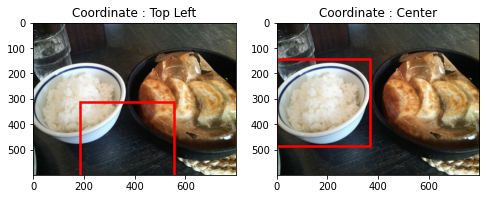

In [64]:
# case1-KFood_edited
img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case1-KFood_edited/kfood_259_30000000.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case1-KFood_edited/kfood_259_30000000.txt'

imgTxtCheck(img, txt)

img,txt 파일 존재 확인
img.size:  600.0 400.0
txt 내용:  ['600', '400', '2', '1', '588', '398', '가리비구이']
Normalization 안됨
label:  가리비구이


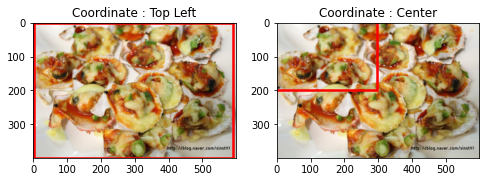

In [65]:
# case2-RDProject1
img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case2-RDProject1/dki_10000000.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case2-RDProject1/dki_10000000.txt'

imgTxtCheck(img, txt)

img,txt 파일 존재 확인
img.size:  300.0 300.0
txt 내용:  ['300', '300', '2', '4', '291', '293', '간장게장']
Normalization 안됨
label:  간장게장


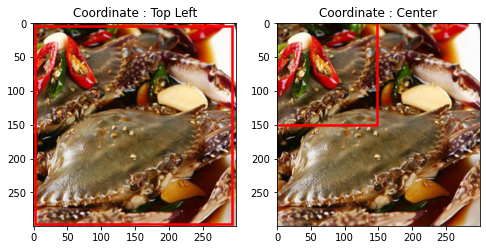

In [66]:
# case3-RDProject3
img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case3-RDProject3/dki_315_300000.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case3-RDProject3/dki_315_300000.txt'

imgTxtCheck(img, txt)

img,txt 파일 존재 확인
img.size:  3024.0 4032.0
txt 내용:  ['3024', '4032', '685', '1234', '1796', '1895', 'None']
Normalization 안됨
label:  가자미찜_dki_200273.txt


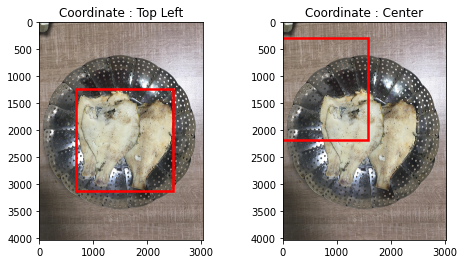

In [67]:
# case4-RDProject5
img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case4-RDProject5/가자미찜_dki_200273.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case4-RDProject5/가자미찜_dki_200273.txt'

imgTxtCheck(img, txt)

img,txt 파일 존재 확인
img.size:  4032.0 3024.0
txt 내용:  ['4032', '3024', '1860.0', '1750.0', '2216', '2412', '미니스톱_명품10찬도시락']
Normalization 안됨
label:  미니스톱_명품10찬도시락


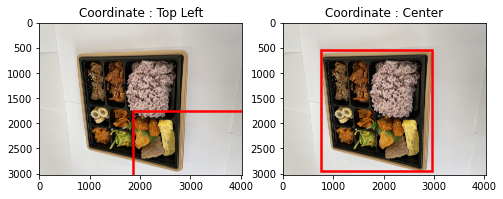

In [68]:
# case5-도시락
img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case5-도시락/dki_미니스톱_명품10찬도시락_95_900211.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case5-도시락/dki_미니스톱_명품10찬도시락_95_900211.txt'

imgTxtCheck(img, txt)

img,txt 파일 존재 확인
img.size:  500.0 333.0
멀티 레이블이다!
txt 내용:  ['500', '333', '13', '9', '125', '305', '비빔밥']
Normalization 안됨
label:  비빔밥
txt 내용:  ['500', '333', '397', '14', '99', '299', '비빔밥']
Normalization 안됨
label:  비빔밥


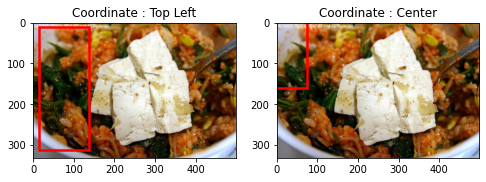

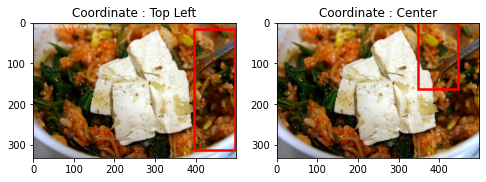

In [57]:
# 멀티
img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case7-멀티/dki_260_300319.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case7-멀티/dki_260_300319.txt'

imgTxtCheck(img, txt)

In [ ]:
# p = re.compile('[^ ,]+')

# def imgTxtCheck(img, txt):
    
#     if os.path.isfile(img) and os.path.isfile(txt):
        
#         print('img,txt 파일 존재 확인')
        
        
#         img = Image.open(img)
#         w, h = img.size
#         w, h = float(w), float(h)
#         print('img.size: ', w, h)
        
#         with open(txt, "r", encoding='utf-8') as text:
#             lines = text.readlines()
#             print(lines)
            
#             for num in range(len(lines)):
#                 line = lines[num].replace('\n', '')
#                 m_line = p.findall(line)
#                 print(m_line)
                
#                 # 노말라이제이션 된 것들
#                 if len(m_line) == 5:
#                     print('Normalization 완료')
                    
#                     label, x_coord, y_coord, bbox_w, bbox_h  = \
#                     class_dic[int(m_line[0])], float(m_line[1]), float(m_line[2]), float(m_line[3]), float(m_line[4])
                    
#                     print('label, x_coord, y_coord, bbox_w, bbox_h: ', label, x_coord, y_coord, bbox_w, bbox_h)
                    
#                     #좌상단 기준의 x,y일 경우
#                     x_left, y_left, w_left, h_left = (x_coord+bbox_w/2)*w, (y_coord+bbox_h/2)*h, bbox_w*w, bbox_h*h
                    
#                     # 센터 기준의 x,y일 경우
#                     x_center, y_center, w_center, h_center = x_coord*w, y_coord*h, bbox_w*w, bbox_h*h
                    
#                     Korim = np.array(img, dtype=np.uint8)
#                     plt.figure(figsize=(7, 7))   
#                     ax1 = plt.subplot(211)
#                     subplot_title=('Top Left')
#                     ax1.set_title(subplot_title)
                    
#                     # Display the image 좌상단
#                     ax1.imshow(Korim)
#                     newPt = [[x_left-w_left/2, y_left+h_left/2], [x_left+w_left/2, y_left+h_left/2], \
#                              [x_left+w_left/2, y_left-h_left/2], [x_left-w_left/2, y_left-h_left/2]]
#                     rect = Polygon(newPt, linewidth=2.5, edgecolor='r', facecolor='none')
# #                     ax1.text(coords[0], coords[1]-15.5, boxtext, fontsize=7, bbox=dict(facecolor='g', alpha=0.5), fontproperties=font_name)
#                     ax1.add_patch(rect)
# #                     plt.figure(figsize=(24, 12))    
# #                     ax1.imshow(Korim)
#                     plt.show()
    
    
    
#                     plt.figure(figsize=(7, 7)) 
#                     ax2 = plt.subplot(212)
#                     subplot_title=('Center')
#                     ax2.set_title(subplot_title)
                    
#                     # Display the image
#                     ax2.imshow(Korim)
#                     newPt = [[x_center-w_center/2, y_center+h_center/2], [x_center+w_center/2, y_center+h_center/2], \
#                              [x_center+w_center/2, y_center-h_center/2], [x_center-w_center/2, y_center-h_center/2]]
#                     rect = Polygon(newPt, linewidth=2.5, edgecolor='r', facecolor='none')
# #                     ax1.text(coords[0], coords[1]-15.5, boxtext, fontsize=7, bbox=dict(facecolor='g', alpha=0.5), fontproperties=font_name)
#                     ax2.add_patch(rect)
# #                     plt.figure(figsize=(24, 12))    
# #                     ax1.imshow(Korim)
#                     plt.show()
                    
                    
    
                    
                    
                    
                    
#                 # 노말라이제이션 안된 것들
#                 elif len(m_line) == 7:
#                     print('Normalization 안됨')
                    
#                     label, w, h, x_coord, y_coord, bbox_w, bbox_h  = \
#                     m_line[6], float(m_line[0]), float(m_line[1]), float(m_line[2]), \
#                     float(m_line[3]), float(m_line[4]), float(m_line[5])
                    
                    
#                     if int(w) != img.size[0] or int(h) != img.size[1]:
#                         print('이미지 사이즈 잘못 측정됨')
                
#                     print(label, w, h, x_coord, y_coord, bbox_w, bbox_h)
                    
# #                     #좌상단 기준의 x,y일 경우
#                     x_left, y_left, w_left, h_left = x_coord+bbox_w/2, y_coord+bbox_h/2, bbox_w, bbox_h
#                     print('x_left, y_left, w_left, h_left: ', x_left, y_left, w_left, h_left)
    
#                     # 센터 기준의 x,y일 경우
#                     x_center, y_center, w_center, h_center = x_coord, y_coord, bbox_w, bbox_h
#                     print('x_center, y_center, w_center, h_center: ', x_center, y_center, w_center, h_center)


#                     Korim = np.array(img, dtype=np.uint8)
#                     plt.figure(figsize=(7, 7))   
#                     ax1 = plt.subplot(211)
#                     subplot_title=('Top Left')
#                     ax1.set_title(subplot_title)
                    
#                     # Display the image 좌상단
#                     ax1.imshow(Korim)
#                     newPt = [[x_left-w_left/2, y_left+h_left/2], [x_left+w_left/2, y_left+h_left/2], \
#                              [x_left+w_left/2, y_left-h_left/2], [x_left-w_left/2, y_left-h_left/2]]
#                     rect = Polygon(newPt, linewidth=2.5, edgecolor='r', facecolor='none')
# #                     ax1.text(coords[0], coords[1]-15.5, boxtext, fontsize=7, bbox=dict(facecolor='g', alpha=0.5), fontproperties=font_name)
#                     ax1.add_patch(rect)
# #                     plt.figure(figsize=(24, 12))    
# #                     ax1.imshow(Korim)
#                     plt.show()
    
    
    
#                     plt.figure(figsize=(7, 7)) 
#                     ax2 = plt.subplot(212)
#                     subplot_title=('Center')
#                     ax2.set_title(subplot_title)
                    
#                     # Display the image
#                     ax2.imshow(Korim)
#                     newPt = [[x_center-w_center/2, y_center+h_center/2], [x_center+w_center/2, y_center+h_center/2], \
#                              [x_center+w_center/2, y_center-h_center/2], [x_center-w_center/2, y_center-h_center/2]]
#                     rect = Polygon(newPt, linewidth=2.5, edgecolor='r', facecolor='none')
# #                     ax1.text(coords[0], coords[1]-15.5, boxtext, fontsize=7, bbox=dict(facecolor='g', alpha=0.5), fontproperties=font_name)
#                     ax2.add_patch(rect)
# #                     plt.figure(figsize=(24, 12))    
# #                     ax1.imshow(Korim)
#                     plt.show()
                    
                    
                    
# #                     # 센터 기준의 x,y일 경우
# #                     x, y, w, h = x_coord, y_coord, bbox_w, bbox_h
 

In [ ]:
# p = re.compile('[^ ,]+')

# def imgTxtCheck(img, txt):
    
#     if os.path.isfile(img) and os.path.isfile(txt):
#         print('img,txt 파일 존재 확인')
        
#         img = Image.open(img)
#         w, h = float(img.size[0]), float(img.size[1])
#         print('img.size: ', w, h)
        
#         with open(txt, "r", encoding='utf-8') as text:
#             lines = text.readlines()
#             if len(lines) > 1:
#                 print('멀티 레이블이다!')

#             for num in range(len(lines)):
#                 line = lines[num].replace('\n', '')
#                 m_line = p.findall(line)
#                 print(m_line)
                
#                 # 노말라이제이션 된 것들
#                 if len(m_line) == 5:
#                     print('Normalization 완료')
                    
#                     label, x_coord, y_coord, bbox_w, bbox_h  = \
#                     class_dic[int(m_line[0])], float(m_line[1]), float(m_line[2]), float(m_line[3]), float(m_line[4])
                    
#                     print('label, x_coord, y_coord, bbox_w, bbox_h: ', label, x_coord, y_coord, bbox_w, bbox_h)
                    
#                     #좌상단 기준의 x,y일 경우
#                     topLeft = [(x_coord+bbox_w/2)*w, (y_coord+bbox_h/2)*h, bbox_w*w, bbox_h*h]
                    
#                     # 센터 기준의 x,y일 경우
#                     center = [x_coord*w, y_coord*h, bbox_w*w, bbox_h*h]
                    
                    
                    
#                     # 노말라이제이션 안된 것들
#                 elif len(m_line) == 7:
#                     print('Normalization 안됨')
                    
#                     label, w_txt, h_txt, x_coord, y_coord, bbox_w, bbox_h  = \
#                     m_line[6], float(m_line[0]), float(m_line[1]), float(m_line[2]), \
#                     float(m_line[3]), float(m_line[4]), float(m_line[5])
                    
                    
#                     if w_txt != w or h_txt != h:
#                         print('이미지 사이즈 잘못 측정됨')
                
#                     print(label, w, h, x_coord, y_coord, bbox_w, bbox_h)
                    
# #                     #좌상단 기준의 x,y일 경우
#                     topLeft = [x_coord+bbox_w/2, y_coord+bbox_h/2, bbox_w, bbox_h]
    
#                     # 센터 기준의 x,y일 경우
#                     center = [x_coord*w, y_coord*h, bbox_w*w, bbox_h*h]
            
            
                    
#                 for i in [topLeft, center]
                    
#                     Korim = np.array(img, dtype=np.uint8)
#                     plt.figure(figsize=(7, 7))   
#                     ax1 = plt.subplot(211)
#                     subplot_title=('Top Left')
#                     ax1.set_title(subplot_title)
                    
#                     # Display the image 좌상단
#                     ax1.imshow(Korim)
#                     newPt = [[x_left-w_left/2, y_left+h_left/2], [x_left+w_left/2, y_left+h_left/2], \
#                              [x_left+w_left/2, y_left-h_left/2], [x_left-w_left/2, y_left-h_left/2]]
#                     rect = Polygon(newPt, linewidth=2.5, edgecolor='r', facecolor='none')
# #                     ax1.text(coords[0], coords[1]-15.5, boxtext, fontsize=7, bbox=dict(facecolor='g', alpha=0.5), fontproperties=font_name)
#                     ax1.add_patch(rect)
# #                     plt.figure(figsize=(24, 12))    
# #                     ax1.imshow(Korim)
#                     plt.show()
    
    
    
#                     plt.figure(figsize=(7, 7)) 
#                     ax2 = plt.subplot(212)
#                     subplot_title=('Center')
#                     ax2.set_title(subplot_title)
                    
#                     # Display the image
#                     ax2.imshow(Korim)
#                     newPt = [[x_center-w_center/2, y_center+h_center/2], [x_center+w_center/2, y_center+h_center/2], \
#                              [x_center+w_center/2, y_center-h_center/2], [x_center-w_center/2, y_center-h_center/2]]
#                     rect = Polygon(newPt, linewidth=2.5, edgecolor='r', facecolor='none')
# #                     ax1.text(coords[0], coords[1]-15.5, boxtext, fontsize=7, bbox=dict(facecolor='g', alpha=0.5), fontproperties=font_name)
#                     ax2.add_patch(rect)
# #                     plt.figure(figsize=(24, 12))    
# #                     ax1.imshow(Korim)
#                     plt.show()
                    
                    
    
                    
                    
                    
                    
#                 # 노말라이제이션 안된 것들
#                 elif len(m_line) == 7:
#                     print('Normalization 안됨')
                    
#                     label, w, h, x_coord, y_coord, bbox_w, bbox_h  = \
#                     m_line[6], float(m_line[0]), float(m_line[1]), float(m_line[2]), \
#                     float(m_line[3]), float(m_line[4]), float(m_line[5])
                    
                    
#                     if int(w) != img.size[0] or int(h) != img.size[1]:
#                         print('이미지 사이즈 잘못 측정됨')
                
#                     print(label, w, h, x_coord, y_coord, bbox_w, bbox_h)
                    
# #                     #좌상단 기준의 x,y일 경우
#                     x_left, y_left, w_left, h_left = x_coord+bbox_w/2, y_coord+bbox_h/2, bbox_w, bbox_h
#                     print('x_left, y_left, w_left, h_left: ', x_left, y_left, w_left, h_left)
    
#                     # 센터 기준의 x,y일 경우
#                     x_center, y_center, w_center, h_center = x_coord, y_coord, bbox_w, bbox_h
#                     print('x_center, y_center, w_center, h_center: ', x_center, y_center, w_center, h_center)


#                     Korim = np.array(img, dtype=np.uint8)
#                     plt.figure(figsize=(7, 7))   
#                     ax1 = plt.subplot(211)
#                     subplot_title=('Top Left')
#                     ax1.set_title(subplot_title)
                    
#                     # Display the image 좌상단
#                     ax1.imshow(Korim)
#                     newPt = [[x_left-w_left/2, y_left+h_left/2], [x_left+w_left/2, y_left+h_left/2], \
#                              [x_left+w_left/2, y_left-h_left/2], [x_left-w_left/2, y_left-h_left/2]]
#                     rect = Polygon(newPt, linewidth=2.5, edgecolor='r', facecolor='none')
# #                     ax1.text(coords[0], coords[1]-15.5, boxtext, fontsize=7, bbox=dict(facecolor='g', alpha=0.5), fontproperties=font_name)
#                     ax1.add_patch(rect)
# #                     plt.figure(figsize=(24, 12))    
# #                     ax1.imshow(Korim)
#                     plt.show()
    
    
    
#                     plt.figure(figsize=(7, 7)) 
#                     ax2 = plt.subplot(212)
#                     subplot_title=('Center')
#                     ax2.set_title(subplot_title)
                    
#                     # Display the image
#                     ax2.imshow(Korim)
#                     newPt = [[x_center-w_center/2, y_center+h_center/2], [x_center+w_center/2, y_center+h_center/2], \
#                              [x_center+w_center/2, y_center-h_center/2], [x_center-w_center/2, y_center-h_center/2]]
#                     rect = Polygon(newPt, linewidth=2.5, edgecolor='r', facecolor='none')
# #                     ax1.text(coords[0], coords[1]-15.5, boxtext, fontsize=7, bbox=dict(facecolor='g', alpha=0.5), fontproperties=font_name)
#                     ax2.add_patch(rect)
# #                     plt.figure(figsize=(24, 12))    
# #                     ax1.imshow(Korim)
#                     plt.show()
                    
                    
                    
# #                     # 센터 기준의 x,y일 경우
# #                     x, y, w, h = x_coord, y_coord, bbox_w, bbox_h
 